<a href="https://colab.research.google.com/github/aakashjain13/100daysofcode/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets

In [4]:
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,10)

**Method 1: Using Mathematical equation**

In [7]:
#load boston housing dataset
!wget https://github.com/dataprofessor/data/raw/master/BostonHousing.csv

--2021-04-11 17:37:38--  https://github.com/dataprofessor/data/raw/master/BostonHousing.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv [following]
--2021-04-11 17:37:38--  https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36242 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  35.39K  --.-KB/s    in 0.003s  

2021-04-11 17:37:38 (11.1 MB/s) - ‘BostonHousing.csv’ saved [36242/36242]



In [8]:
boston_ds = pd.read_csv('BostonHousing.csv')

In [9]:
Y = boston_ds.medv

In [10]:
X = boston_ds.tax

In [11]:
#mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [12]:
"""calculating slope m/B1 as 

m = (Sum((X[i]-mean_x))*Sum((Y[i]-mean_y)))/(X[i]-mean_x)**2
"""
num = 0
denom = 0
for i in range(len(X)):
    num+= (X[i] - mean_x)*(Y[i]-mean_y)
    denom+= (X[i] - mean_x)**2

b1 = num/denom
b0 =  mean_y - (b1*mean_x)

#print coefficients
print('Intercept : {} \nSlope : {}'.format(b0,b1))

Intercept : 32.9706544936663 
Slope : -0.025568099481987225


In [13]:
#calcualting predicted 
min_x = np.min(X) - 100
max_x = np.max(X)+100

In [14]:
#calculating line values in min and max
x = np.linspace(min_x,max_x,1000)
y = b0+b1*x 

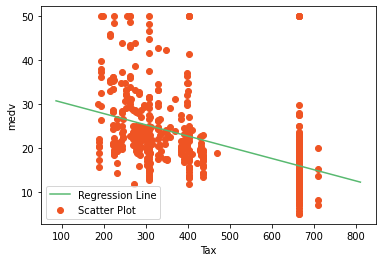

In [16]:
#ploting line 
plt.plot(x,y,color='#58b970', label='Regression Line')
plt.scatter(X,Y,c='#ef5423',label='Scatter Plot')
plt.xlabel('Tax')
plt.ylabel('medv')
plt.legend()
plt.show()

**Goodness of Fit** defines how well the regression line fits the data or the measure of error for our model i.e. to measure the difference between the actual and predicted value of target variables

**Coefficient of Determination or R-squared method**

**Calcualted as** (1-(tss/sst)) where

**TSS** stands for **'Total Sum of Squares'**, is **Sum((y[i]-mean_y)^2)**

**RSS** stands for **'Residual sum of squares'**,  **Sum((y_pred[i]-y[i])^2)**

**Mean Squared Error** 

**Calculated as**  ((Y[i]-y_pred[i])^2)/len(X)

In [25]:
#calculating R-squared 
tss = 0
rss = 0
for i in range(len(X)):
  y_pred = b0+b1*X[i]
  tss+= (Y[i]-mean_y)**2
  rss+= (y_pred-Y[i])**2

r2 = 1 -(rss/tss)
mse = rss/len(X)
print('R2 value is {:.2f} and MSE is {:.2f}'.format(r2,mse))



R2 value is 0.22 and MSE is 65.89


**Method 2 : Using skLearn**

In [ ]:
diabetes = datasets.load_diabetes()

**Create X and Y Data matrices**

In [ ]:
X = diabetes.data
Y = diabetes.target

In [ ]:
X.shape,Y.shape

((442, 10), (442,))

**Data Split**

**Perform 80/20 Train test data split**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

**Linear Regression Model**

Define Regression Model

In [ ]:
model = linear_model.LinearRegression()

Build Regression Model

In [ ]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Apply trained model to make prediction (on test set)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print('coefficients {}'.format(model.coef_))
print('Intercept', model.intercept_)
print('Mean Squared Error (MSE): {:.2f}'.format(mean_squared_error(Y_test,y_pred)))
print('Coefficient of Determination (R^2) :{:.2f}'.format(r2_score(Y_test,y_pred)))

coefficients [   4.65757921 -236.02911451  533.56216603  319.50003797 -795.76023257
  464.25447779   97.21146681  135.96831058  779.93635241   77.55299833]
Intercept 152.81437259498887
Mean Squared Error (MSE): 2837.20
Coefficient of Determination (R^2) :0.48
